In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

#variable path to contain directory with Yelp data
path = '/home/dummy_user/badams_testing/'

In [36]:
sun_df = pd.read_csv(path + 'monthly_sunspots.csv')

In [37]:
sun_df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [38]:
sun_df.isnull().sum()

Month       0
Sunspots    0
dtype: int64

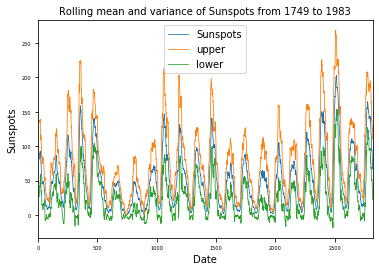

In [39]:
# Compute the 12 month rolling mean of the sunspots DataFrame
ma = sun_df.rolling(window=12).mean()

# Compute the 12 month rolling standard deviation of the sunspots DataFrame
mstd = sun_df.rolling(window=12).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['Sunspots'] + (2 * mstd['Sunspots'])

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['Sunspots'] - (2 * mstd['Sunspots'])

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=5)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Sunspots', fontsize=10)
ax.set_title('Rolling mean and variance of Sunspots from 1749 to 1983', fontsize=10)
plt.show()

Above we have a chart showing the rolling mean and variance for our sunspot data, which allows us to smooth out short term flucations, highlight long term trends/cycles, and remove outliers.  Below you can see the mean of our sunset data by year as well.

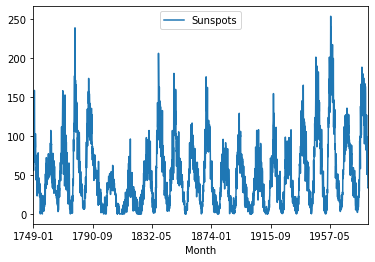

In [40]:
sun_df_by_year  = sun_df.groupby('Month').mean()
sun_df_by_year.plot()
plt.show()

In [41]:
sun_df.describe()

,Sunspots
count,2820.000000
mean,51.265957
std,43.448971
min,0.000000
25%,15.700000
50%,42.000000
75%,74.925000
max,253.800000


From the summary statistics of oiur Sunspot data we can see we have a mean of 51, minimum of 0 and a Max of 253.8.  our standard Deviation for his dataset is 43.44.
Below we are displaying a histogram of the sunspot data.  This output shows our data is right-skewed that could indicate that we have a number od data points that are greater than our mode.

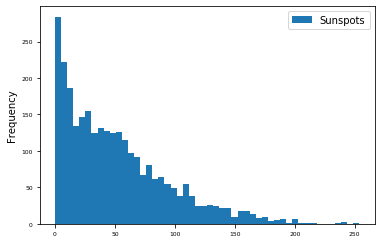

In [43]:
# Generate a histogram
sun_hist = sun_df.plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('Sunspots', fontsize=10)
ax.set_ylabel('Histogram of Sunspots', fontsize=10)
plt.legend(fontsize=10)
plt.show()

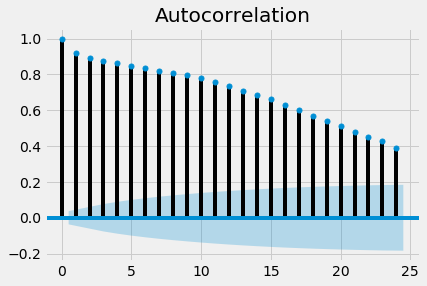

In [44]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(sun_df['Sunspots'], lags=24)

# Show plot
plt.show()

Above we have run an autocorrelation plot.  There are a couple things we can intepret from this plot.  The first is that as the values get closer to one, the consecutie observations are correlated to one another, in this case in a positive way.  The second thing we can take away from this chart, is that our values go beyond the blue shaded region (which represents the confidence intervals) which indicates these values are statistically significant. 

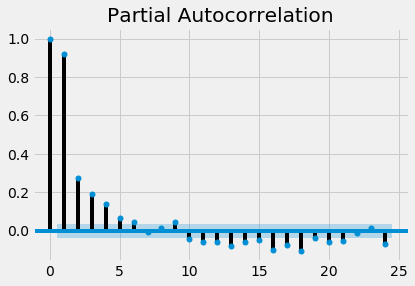

In [45]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(sun_df['Sunspots'], lags=24)

# Show plot
plt.show()

Above we have run a Partitial Autocorrelation plot.  In partial autocorrelation we want to see at which lag vlaues do we have statistically significant partial autocorrelations.  Here we can see that at points 0 through 5, and 11 through 18, point 20, 21 and 25 are statistically significant autocorrelations.  

Now lets run the decomposition method for our time-series data.  This allows us to extract and quantify the structure of our time-series data.  

In [64]:
# Import statsmodels.api as sm
import statsmodels.api as sm

#code to index our dataset with the month column
#sun_df = sun_df.set_index('Month')

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(sun_df, freq=12)

# Print the seasonality component
print(decomposition.seasonal)

         Sunspots
Month            
1749-01 -2.161902
1749-02 -0.108501
1749-03 -1.275435
1749-04 -0.240018
1749-05  1.142211
...           ...
1983-08  0.756047
1983-09  1.068137
1983-10  0.622001
1983-11 -0.517030
1983-12  0.355156

[2820 rows x 1 columns]


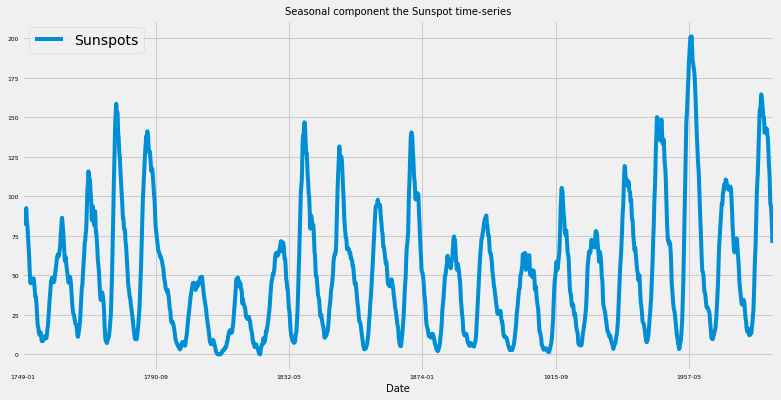

In [56]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the Sunspot time-series', fontsize=10)
plt.show()

So we can see there is is a pretty consisntent trend and seasonlaity in our data, with peaks in May and September nearly each year, and shows large difference between seasons.  

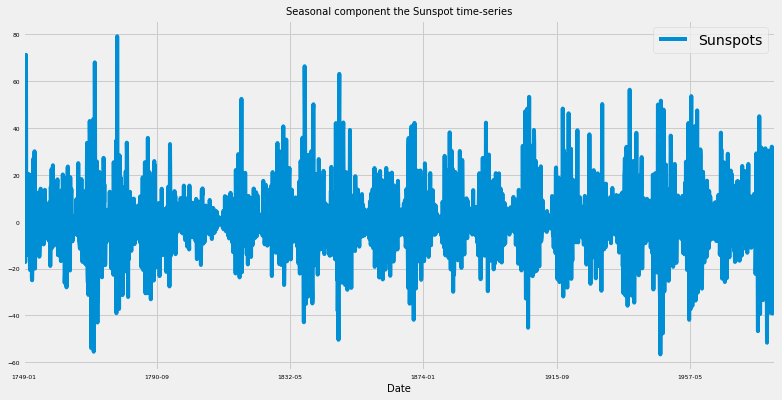

In [65]:
# Extract the noise component
noise = decomposition.resid

# Plot the values of the trend
ax = noise.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the Sunspot time-series', fontsize=10)
plt.show()

We can see here that the residual values are large, corresponsding to the amount of sunsposts.  